
## 1. Implementation a of single-layer Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from util_scripts.util_mnist_reader import load_mnist

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model
import seaborn as sn



Using TensorFlow backend.


In [2]:
X_train, Y_train = load_mnist("util_scripts/data/fashion", kind='train')
X_test, Y_test = load_mnist("util_scripts/data/fashion", kind='t10k')

In [3]:
#Shape of Training data
print("Training data shape:", X_train.shape)
print("Training result shape:", Y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing result shape:", Y_test.shape)

Training data shape: (60000, 784)
Training result shape: (60000,)
Testing data shape: (10000, 784)
Testing result shape: (10000,)


In [4]:
#Defining X1 and Y1
X1 = np.array(X_train)/255.0
Y_data = np.array(Y_train)
Y1 = np.array([np.eye(10)[each] for each in Y_data])

#Defining X_test_1 and Y_test_1
X_test_1 = np.array(X_test)/255.0
Y_test_data = np.array(Y_test)
Y_test_1 = np.array([np.eye(10)[each] for each in Y_test_data])

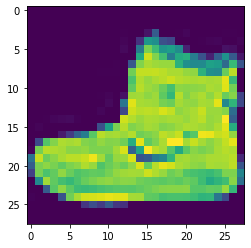

In [5]:
#Checking the value of an input
plt.imshow(X1[0].reshape(28,28))

In [6]:
def initialize_weights():
    
    #Defining initial Weights-1
    W1 = np.random.rand(784, 342)*0.01

    #Defining initial Bias-1
    b1 = np.zeros((1, 342))
    
    #Defining initial Weights-2 
    W2 = np.random.rand(342, 10)*0.01

    #Defining initial Bias-1
    b2 = np.zeros((1, 10))
    
    
    return W1, b1, W2, b2

In [7]:
#softmax function
def softmax(X):
    return np.array([[np.exp(i)/np.sum(np.exp(each)) for i in each] for each in X])

In [8]:
#Calculating the Cross-Entropy Loss L = -1 * sum(y*logA2)
def CrossEntropyLossFunc(Y, A2):
    A2 = A2 + 0.0000001 #to avoid the log of 0 error
    return -1 * np.sum(np.multiply(Y, np.log(A2)))/Y.shape[0]  
    

In [9]:
#Sigmoid Function
def sigmoid(x):
    return 1/(1+(np.exp(-x)))

In [10]:
#Defining the feed forward function
def FeedForward(X, Y, W1, b1, W2, b2):
    
    #Z1 = X*W1 + b1
    Z1 = np.dot(X, W1) + b1
    
    #Applying Sigmoid as the first activation function
    A1 = sigmoid(Z1)
    
    #Z2 = A1*W2 + b2
    Z2 = np.dot(A1, W2) + b2
    
    #Applying Softmax as the second activation function
    A2 = softmax(Z2)
    
    L = CrossEntropyLossFunc(Y, A2)
    
    return A1, A2, W1, b1, W2, b2, L

In [11]:
def BackPropagation(learning_rate, X, Y, A1, A2, W1, b1, W2, b2, L):
    #We need to find the back propagation values for delta(weight) and delta(bias)
    dZ2 = A2 - Y
    dZ2 /= dZ2.shape[0]
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis= 0, keepdims = True)#Summing to get the appropriate shape of the matrix
    dZ1 = np.dot(dZ2, W2.T)
    dW1 = np.dot(X.T,dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)    #Summing to get the appropriate shape of the matrix
    
    W2 = W2 - learning_rate*(dW2)
    W1 = W1 - learning_rate*(dW1)
    b2 = b2 - learning_rate*(db2)
    b1 = b1 - learning_rate*(db1)
    return W2, b2, W1, b1

In [ ]:
epochs = 150
learning_rate = 0.28
W1, b1, W2, b2 = initialize_weights()
loss = []
accuracy = []
val_accuracy = []
val_loss = []
for epoch in range(epochs):
    A1, A2, W1, b1, W2, b2, L = FeedForward(X1, Y1, W1, b1, W2, b2)
    
    #using the testing data for validation
    A1_val, A2_val, W1_val, b1_val, W2_val, b2_val, L_val = FeedForward(X_test_1, Y_test_1, W1, b1, W2, b2)


    W2, b2, W1, b1 = BackPropagation(learning_rate, X1, Y1, A1, A2, W1, b1, W2, b2, L)   
    
    loss.append(L)
    prediction = np.argmax(A2, axis = 1)
    accuracy.append(np.mean(prediction == Y_data))

    val_loss.append(L_val)
    val_prediction = np.argmax(A2_val, axis = 1)
    val_accuracy.append(np.mean(val_prediction == Y_test_data))
    
#plot Cross-Entropy Loss vs Epoch data    
plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss VS Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'], loc = 'upper left')
plt.show()

#plot Accuracy vs Epoch data
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Accuracy VS Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'], loc = 'upper left')
plt.show()

In [ ]:
#Testing the hyperparameters on test data

A1_test, A2_test, W1, b1, W2, b2, L_test = FeedForward(X1, Y1, W1, b1, W2, b2)

prediction_test = np.argmax(A2_test, axis = 1)
Accuracy = np.mean(prediction_test == Y_data)
print("Accuracy:")
print(Accuracy)
print("Loss:")
print(L_test)

confusion_matrix = metrics.confusion_matrix(y_true=prediction_test, y_pred=prediction)
print("Confusion Matrix:")
print(confusion_matrix)
print('\n')

In [ ]:
df_cm = pd.DataFrame(confusion_matrix, range(10), range(10))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot_kws={"size": 16})# font size

## 2. Multi-layer Neural Network Using Keras

In [ ]:
model = Sequential()
model.add(Dense(300, activation='sigmoid', input_dim=784))
model.add(Dropout(0.5))
model.add(Dense(150, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#using Stochastic Gradient Descent
sgd = SGD(lr=0.35)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

res=model.fit(X1, Y1,
          validation_split=0.10,
          epochs=60,
          batch_size=100)


# Training Loss vs Validation Loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

# Training Accuracy vs Validation Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()


test_loss, test_accuracy = model.evaluate(X_test_1, Y_test_1, batch_size=100)

test_prediction = model.predict(X_test_1)

confusion_matrix = metrics.confusion_matrix(y_true=np.argmax(Y_test_1,axis=1), y_pred=np.argmax(test_prediction,axis=1))

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

print("Confusion Matrix:")
print(confusion_matrix)

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
df_cm = pd.DataFrame(confusion_matrix, range(10), range(10))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot_kws={"size": 16})# font size

## 3. Convolutional Neural Network Using Keras

In [ ]:
CNNmodel = Sequential()

#1st Convolution Layer
CNNmodel.add(Conv2D(32,  kernel_size=(5,5), padding="same", input_shape=[28,28,1]))
#1st MaxPool Layer
CNNmodel.add(MaxPooling2D(pool_size=(2, 2)))

#2nd Convolution Layer
CNNmodel.add(Conv2D(64, kernel_size=(5,5), activation='sigmoid'))
#2nd Maxpool Layer
CNNmodel.add(MaxPooling2D(pool_size=(2, 2)))

#3rd Convolution Layer
CNNmodel.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
#3rd Maxpool Layer
CNNmodel.add(MaxPooling2D(pool_size=(2, 2)))
CNNmodel.add(Dropout(0.5))

 
CNNmodel.add(Flatten())
CNNmodel.add(Dense(1024, activation='relu'))
CNNmodel.add(Dropout(0.5))
CNNmodel.add(Dense(10, activation='softmax'))

print(CNNmodel.summary())

plot_model(CNNmodel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#Training our CNN
CNNmodel.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.23),
              metrics=['accuracy'])

res = CNNmodel.fit(X1.reshape(X1.shape[0],28,28,1), Y1,
          validation_split=0.10,
          epochs=100,
          batch_size=512)

# Training Loss vs Validation Loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

# Training Accuracy vs Validation Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()


In [ ]:

test_loss, test_accuracy = CNNmodel.evaluate(X_test_1.reshape(X_test_1.shape[0],28,28,1), Y_test_1)
print("Test Loss:", test_loss)
print("Test Accuracy", test_accuracy)

prediction = CNNmodel.predict_classes(X_test_1.reshape(X_test_1.shape[0],28,28,1))
Confusion_matrix = metrics.confusion_matrix(y_true = np.argmax(Y_test_1,axis=1), y_pred = prediction)

print("Confusion Matrix:")
print(Confusion_matrix)

In [ ]:
df_cm = pd.DataFrame(confusion_matrix, range(10), range(10))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot_kws={"size": 16})# font size